In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fraud=pd.read_csv('/content/Fraud.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
missing_values = fraud.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [11]:
fraud_cleaned=fraud.dropna()
Missing_Values=fraud_cleaned.isnull().sum()
print(Missing_Values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [14]:
legit = len(fraud_cleaned[fraud_cleaned.isFraud == 0])
fraud = len(fraud_cleaned[fraud_cleaned.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  219609
Number of Fraud transactions:  155
Percentage of Legit transactions: 99.9295 %
Percentage of Fraud transactions: 0.0705 %


In [15]:
"""These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 %
 and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR
 IMBALANCED DATA."""
X = fraud_cleaned[fraud_cleaned['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


# **Visualization**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-17-b6a3729fc1b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=fraud_cleaned.corr()


<Axes: >

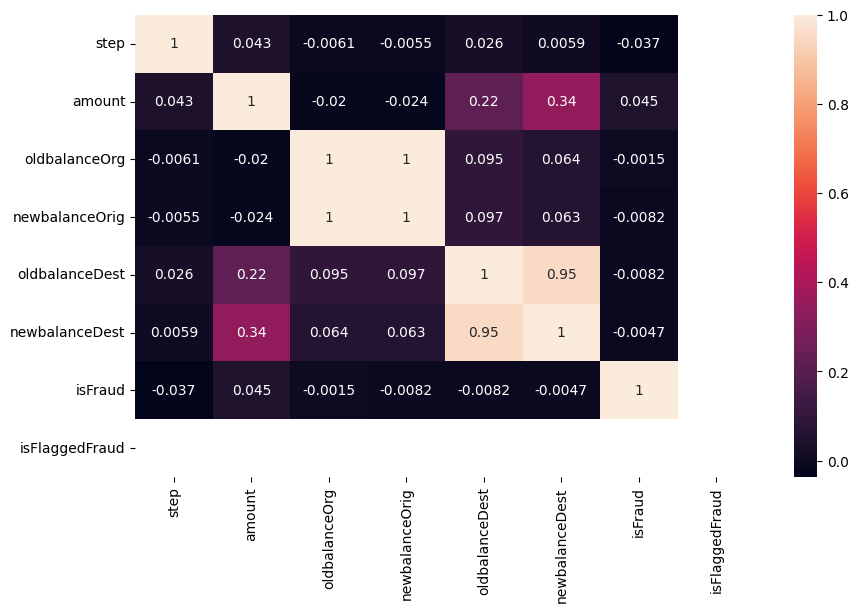

In [17]:
corr=fraud_cleaned.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

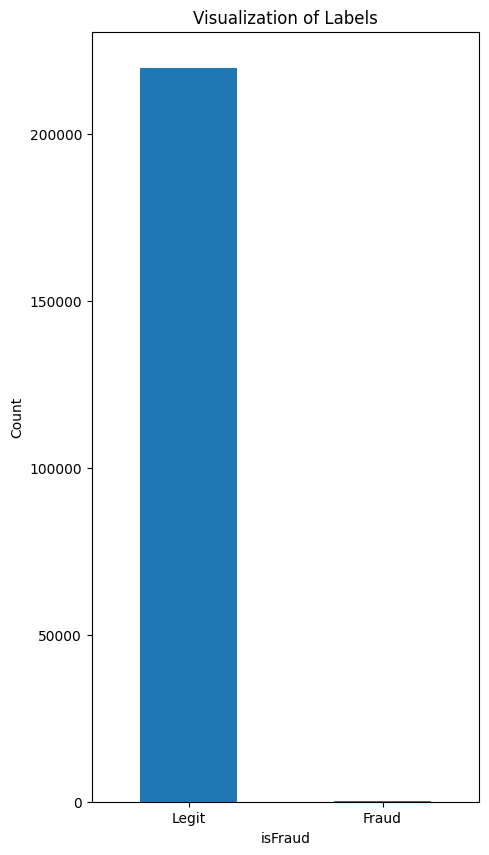

In [19]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = fraud_cleaned.value_counts(fraud_cleaned['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [21]:
#creating a copy of a dataset
df=fraud_cleaned.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [22]:
# Checking how many attributes are dtype: object

objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### **THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.**

In [23]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219764 entries, 0 to 219763
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            219764 non-null  int64  
 1   type            219764 non-null  int64  
 2   amount          219764 non-null  float64
 3   nameOrig        219764 non-null  int64  
 4   oldbalanceOrg   219764 non-null  float64
 5   newbalanceOrig  219764 non-null  float64
 6   nameDest        219764 non-null  int64  
 7   oldbalanceDest  219764 non-null  float64
 8   newbalanceDest  219764 non-null  float64
 9   isFraud         219764 non-null  float64
 10  isFlaggedFraud  219764 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 20.1 MB
None


In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,26251,170136.0,160296.36,63646,0.0,0.0,0.0,0.0
1,1,3,1864.28,75339,21249.0,19384.72,66265,0.0,0.0,0.0,0.0
2,1,4,181.00,34532,181.0,0.00,17737,0.0,0.0,1.0,0.0
3,1,1,181.00,201480,181.0,0.00,15786,21182.0,0.0,1.0,0.0
4,1,3,11668.14,118593,41554.0,29885.86,32493,0.0,0.0,0.0,0.0


**MULTICOLINEARITY**

In [25]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,5.671807
1,type,5.903772
2,amount,2.086322
3,nameOrig,3.624134
4,oldbalanceOrg,611.605041
5,newbalanceOrig,619.559771
6,nameDest,4.294039
7,oldbalanceDest,16.026286
8,newbalanceDest,17.731248
9,isFraud,1.026136


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [26]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.040321
1,amount,1.639928
2,isFraud,1.024997
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.188645
5,Actual_amount_dest,1.449028
6,TransactionPath,2.860099


<Axes: >

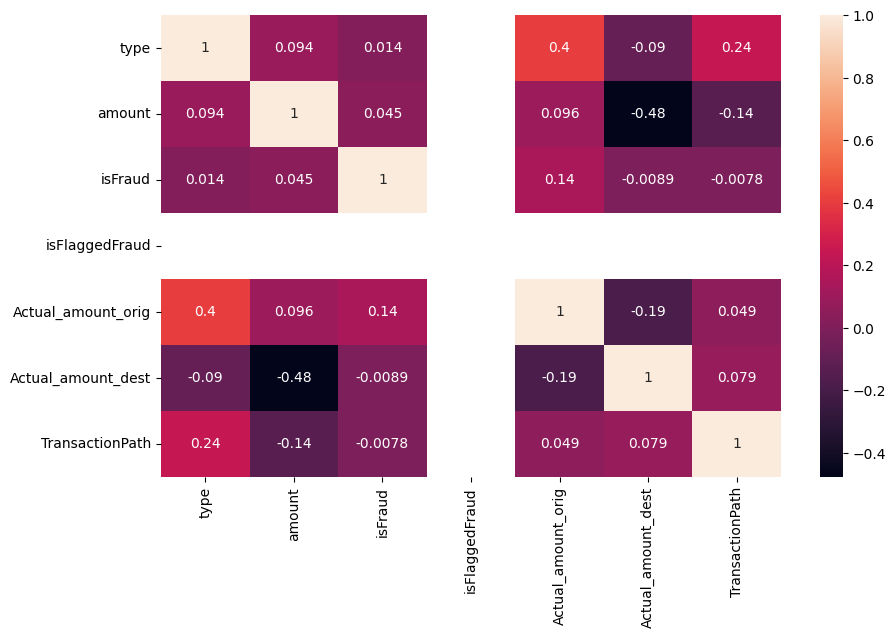

In [27]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**Model**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
#NORMALIZING (SCALING) AMOUNT
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [30]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (153834, 6)
Shape of X_test:  (65930, 6)


In [31]:
# MODEL TRAINIG( DECISION TREE )

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [32]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

**Evaluation**

In [33]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.9150614287881
Random Forest Score:  99.95904747459427


In [34]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 12
False Positives: 30
True Negatives: 65862
False Negatives: 26
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 12
False Positives: 1
True Negatives: 65891
False Negatives: 26


Random Forest outperforms Decision Tree in terms of True Positives, False Positives, and True Negatives, making it the better choice overall.

In [35]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[65862    30]
 [   26    12]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[65891     1]
 [   26    12]]


In [36]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65892
         1.0       0.29      0.32      0.30        38

    accuracy                           1.00     65930
   macro avg       0.64      0.66      0.65     65930
weighted avg       1.00      1.00      1.00     65930

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65892
         1.0       0.92      0.32      0.47        38

    accuracy                           1.00     65930
   macro avg       0.96      0.66      0.74     65930
weighted avg       1.00      1.00      1.00     65930



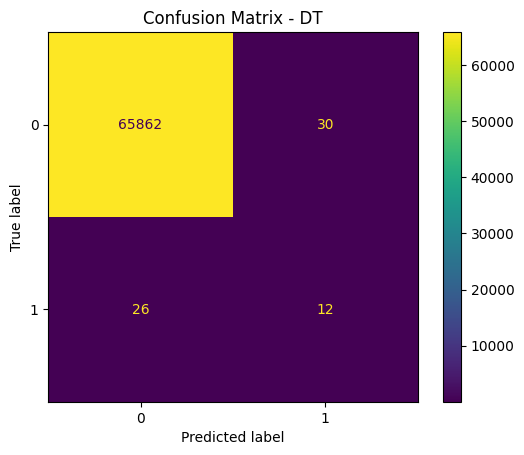

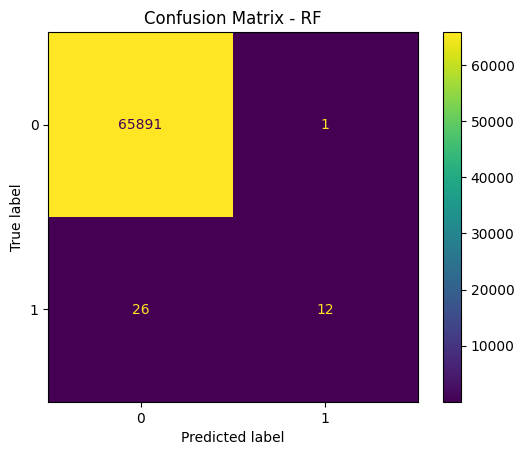

In [37]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

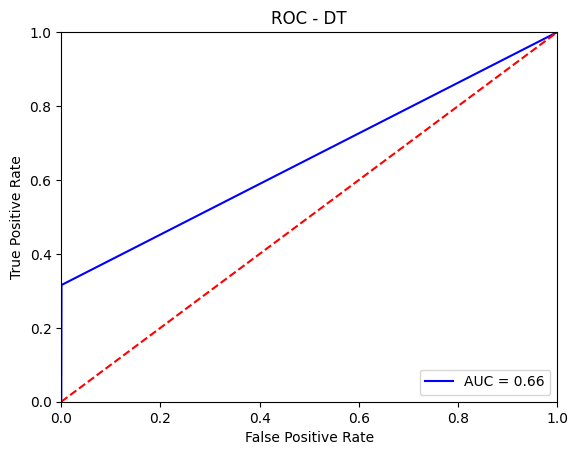

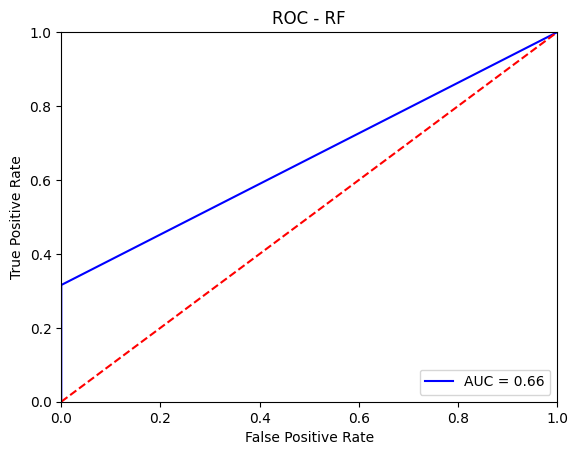

In [38]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

### Prevention Measures during Infrastructure Updates:

1. **Use Smart Verified Apps Only:**
   - Ensure that only authorized and verified applications are utilized during infrastructure updates. Implement a strict vetting process for app selection.

2. **Browse Through Secured Websites:**
   - Enforce the use of secure and verified websites for all online activities during infrastructure updates. Educate employees about recognizing and avoiding unsecured sites.

3. **Use Secured Internet Connections (Use VPN):**
   - Require the use of Virtual Private Networks (VPNs) to establish secure and encrypted connections, especially when accessing sensitive information or performing critical tasks during infrastructure updates.

4. **Keep Mobile and Laptop Security Updated:**
   - Enforce regular updates and patches for mobile devices and laptops to address security vulnerabilities. Implement robust endpoint security measures to protect against potential threats.

5. **Don't Respond to Unsolicited Communications:**
   - Educate employees about the risks associated with responding to unsolicited calls, emails, or messages. Encourage a culture of skepticism and verify the legitimacy of communications during infrastructure updates.

6. **Contact Bank Immediately in Case of Suspected Compromise:**
   - Establish a clear protocol for employees to follow in the event of suspected security compromises. Immediate communication with the bank and relevant authorities should be prioritized.

### Evaluation of Prevention Measures:

Assuming these prevention measures have been implemented, their effectiveness can be assessed through the following methods:

1. **Monitoring E-Statements:**
   - Regularly review electronic statements for any unauthorized or suspicious transactions. Unusual patterns or discrepancies should be thoroughly investigated.

2. **Regularly Checking Account Activity:**
   - Encourage employees to regularly monitor their account activities, looking for any unusual transactions or unauthorized access. Prompt reporting of suspicious activities is crucial.

3. **Maintaining Payment Logs:**
   - Keep detailed logs of all payments made during infrastructure updates. This documentation provides a reference point for verifying legitimate transactions and detecting any discrepancies.

4. **Security Audits and Penetration Testing:**
   - Conduct regular security audits and penetration testing to identify vulnerabilities in the updated infrastructure. Address any weaknesses promptly to enhance the overall security posture.

5. **Incident Response Plan:**
   - Evaluate the effectiveness of the incident response plan in place. If a security incident occurs, assess how well the team follows the established procedures and how quickly and effectively they respond to mitigate potential risks.


Regular training, awareness programs, and continuous improvement of security protocols are essential for ensuring the ongoing effectiveness of the prevention measures. Periodic reviews and updates to the prevention strategies should align with emerging cybersecurity threats.